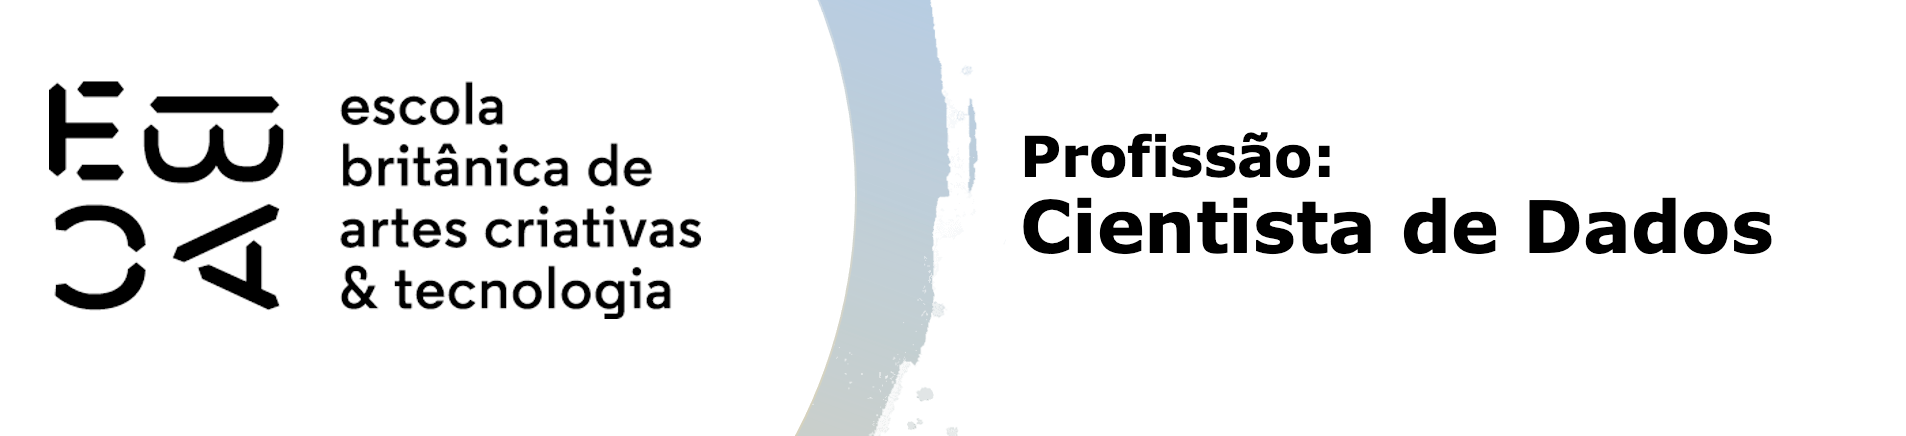

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [4]:
# Converter a coluna 'Data Emissão' para datetime
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'])

# Criar variáveis temporais
df['Dia da Semana'] = df['Data Emissão'].dt.dayofweek  # 0 = Segunda-feira, 6 = Domingo
df['Fim de Semana'] = df['Dia da Semana'].isin([5, 6]).astype(int)  # 1 se for sábado ou domingo, 0 caso contrário
df['Dia do Mês'] = df['Data Emissão'].dt.day
df['Trimestre'] = df['Data Emissão'].dt.quarter

# Criar categorizações do Valor NF
quantis = [5, 10, 20, 50]
for q in quantis:
    df[f'Valor NF Cat {q}'] = pd.qcut(df['Valor NF'], q, labels=False, duplicates='drop')

# Visualizar as primeiras linhas
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,...,flag_credito,categoria,Dia da Semana,Fim de Semana,Dia do Mês,Trimestre,Valor NF Cat 5,Valor NF Cat 10,Valor NF Cat 20,Valor NF Cat 50
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,...,0,Mercado,4,0,30,2,1,3,7,17
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,...,0,Auto posto,4,0,30,2,2,5,11,28
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,...,1,Restaurantes,4,0,30,2,1,3,7,19
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,...,1,Restaurantes,4,0,30,2,3,7,15,38
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,...,1,Restaurantes,4,0,30,2,3,7,15,39


## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [6]:
# Função para calcular Information Value (IV)
def calc_iv(df, feature, target):
    iv_df = df.groupby(feature).agg({target: ['sum', 'count']})
    iv_df.columns = ['Pos', 'Total']
    iv_df['Neg'] = iv_df['Total'] - iv_df['Pos']
    iv_df['Pos Rate'] = iv_df['Pos'] / iv_df['Pos'].sum()
    iv_df['Neg Rate'] = iv_df['Neg'] / iv_df['Neg'].sum()
    iv_df['WOE'] = np.log(iv_df['Pos Rate'] / iv_df['Neg Rate']).replace({np.inf: 0, -np.inf: 0})
    iv_df['IV'] = (iv_df['Pos Rate'] - iv_df['Neg Rate']) * iv_df['WOE']
    return iv_df['IV'].sum()

# Calcular IV para todas as variáveis criadas
features = ['Dia da Semana', 'Fim de Semana', 'Dia do Mês', 'Trimestre'] + [f'Valor NF Cat {q}' for q in quantis]
iv_values = {feature: calc_iv(df, feature, 'flag_credito') for feature in features}

# Criar DataFrame de metadados
iv_df = pd.DataFrame.from_dict(iv_values, orient='index', columns=['IV']).reset_index()
iv_df.rename(columns={'index': 'Feature'}, inplace=True)

# Visualizar o IV das variáveis
iv_df.sort_values(by='IV', ascending=False)


,Feature,IV
7,Valor NF Cat 50,0.152315
6,Valor NF Cat 20,0.124525
5,Valor NF Cat 10,0.106650
4,Valor NF Cat 5,0.056695
2,Dia do Mês,0.043719
3,Trimestre,0.011507
0,Dia da Semana,0.006883
1,Fim de Semana,0.004346


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

- As variáveis relacionadas ao Valor NF categorizado apresentam os maiores valores indicando que o valor da nota fiscal tem um forte impacto na previsão da concessão de créditos''  
- Observa-se uma tendência de aumentar o IV conforme o número de categorias cresce.

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

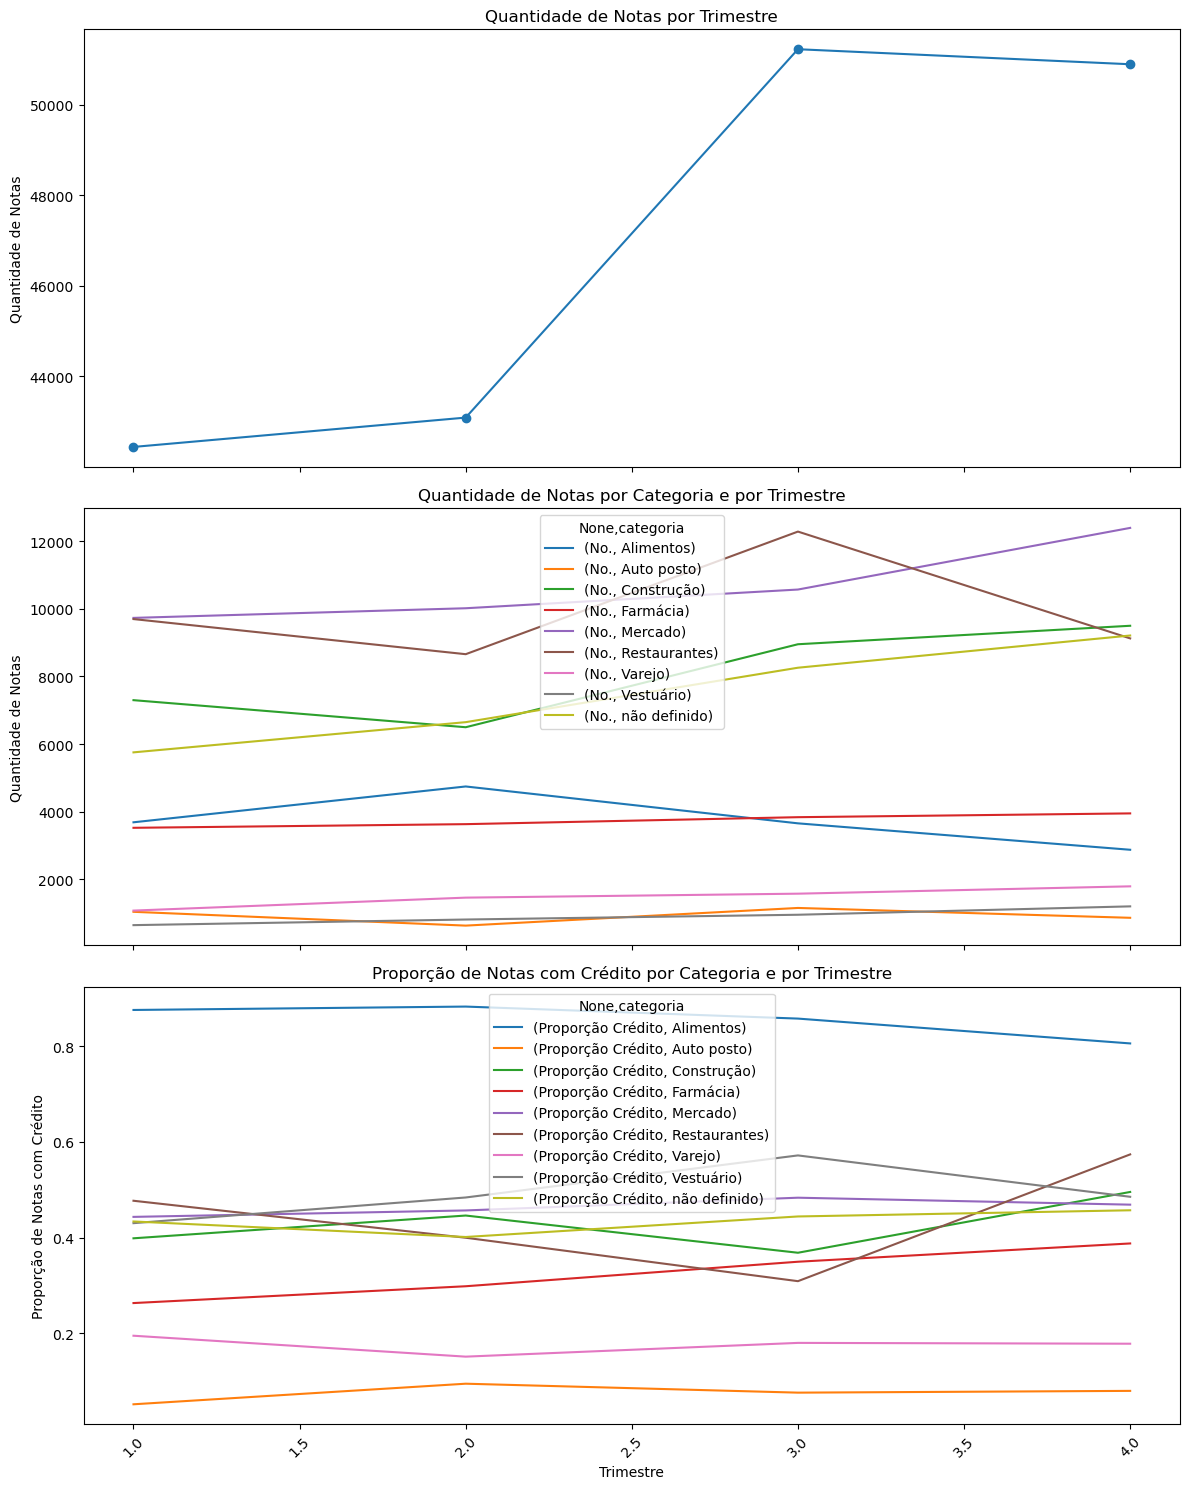

In [14]:
# Análise descritiva no tempo
agg_trimestre = df.groupby('Trimestre').agg({'No.': 'count', 'flag_credito': 'sum'}).rename(columns={'No.': 'Total Notas', 'flag_credito': 'Notas com Crédito'})
agg_trimestre['Proporção Crédito'] = agg_trimestre['Notas com Crédito'] / agg_trimestre['Total Notas']

# Quantidade de notas por categoria e por período
agg_categoria = df.groupby(['Trimestre', 'categoria']).agg({'No.': 'count'}).unstack(fill_value=0)

# Proporção de notas com crédito por categoria e por período
agg_categoria_credito = df.groupby(['Trimestre', 'categoria']).agg({'flag_credito': 'sum', 'No.': 'count'})
agg_categoria_credito['Proporção Crédito'] = agg_categoria_credito['flag_credito'] / agg_categoria_credito['No.']
agg_categoria_credito = agg_categoria_credito[['Proporção Crédito']].unstack(fill_value=0)

# Plotagens
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Quantidade de notas registradas por período
agg_trimestre['Total Notas'].plot(ax=axes[0], marker='o', title='Quantidade de Notas por Trimestre')
axes[0].set_ylabel('Quantidade de Notas')

# Quantidade de notas por categoria e por período
agg_categoria.plot(ax=axes[1], title='Quantidade de Notas por Categoria e por Trimestre')
axes[1].set_ylabel('Quantidade de Notas')

# Proporção de notas com crédito por categoria e por período
agg_categoria_credito.plot(ax=axes[2], title='Proporção de Notas com Crédito por Categoria e por Trimestre')
axes[2].set_ylabel('Proporção de Notas com Crédito')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

<Figure size 1200x500 with 0 Axes>

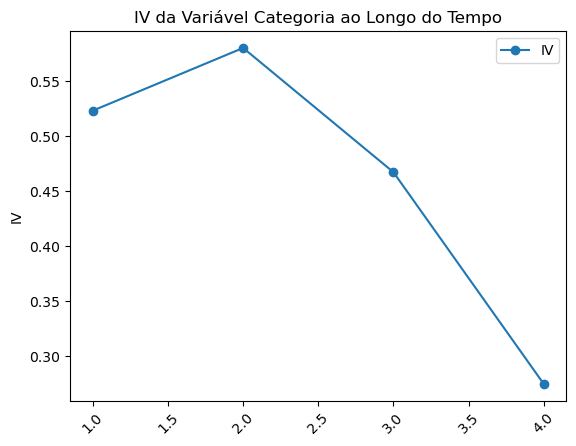

<Figure size 1200x600 with 0 Axes>

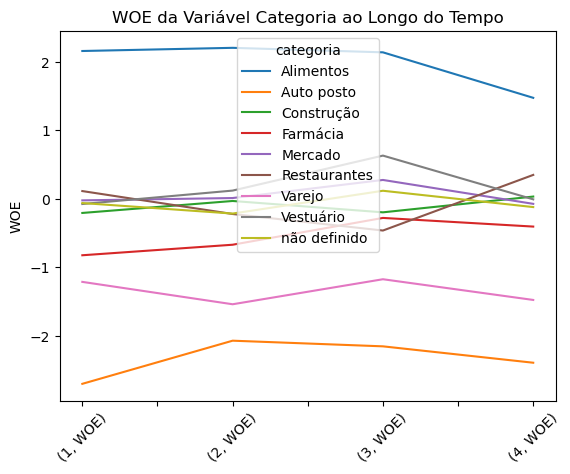

In [16]:
# Calcular WOE e IV por trimestre para a variável categoria
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature).agg({target: ['sum', 'count']})
    grouped.columns = ['Good', 'Total']
    grouped['Bad'] = grouped['Total'] - grouped['Good']
    grouped['Good_Dist'] = grouped['Good'] / grouped['Good'].sum()
    grouped['Bad_Dist'] = grouped['Bad'] / grouped['Bad'].sum()
    grouped['WOE'] = np.log(grouped['Good_Dist'] / grouped['Bad_Dist']).replace([np.inf, -np.inf], 0)
    grouped['IV'] = (grouped['Good_Dist'] - grouped['Bad_Dist']) * grouped['WOE']
    return grouped[['WOE', 'IV']].sum().IV, grouped[['WOE']]

iv_time = {}
woe_time = {}
for period in df['Trimestre'].unique():
    subset = df[df['Trimestre'] == period]
    iv, woe = calculate_woe_iv(subset, 'categoria', 'flag_credito')
    iv_time[period] = iv
    woe_time[period] = woe

# Converter para DataFrame
iv_df = pd.DataFrame.from_dict(iv_time, orient='index', columns=['IV']).sort_index()
woe_df = pd.concat(woe_time, axis=1).T.sort_index()

# Plot IV ao longo do tempo
plt.figure(figsize=(12, 5))
iv_df.plot(marker='o', title='IV da Variável Categoria ao Longo do Tempo')
plt.ylabel('IV')
plt.xticks(rotation=45)
plt.show()

# Plot WOE ao longo do tempo
plt.figure(figsize=(12, 6))
woe_df.plot(title='WOE da Variável Categoria ao Longo do Tempo')
plt.ylabel('WOE')
plt.xticks(rotation=45)
plt.show()

## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

- Algumas categorias apresentam valores de WOE mais altos de forma consistente, o que sugere que elas possuem uma maior proporção de notas com crédito. Categorias como "Alimentos" e "Restaurantes" parecem ter retornos mais elevados, enquanto "Auto Posto" apresenta WOE negativo, indicando uma menor proporção de notas com crédito.
- O IV da variável "categoria" diminuiu ao longo do tempo, sugerindo que seu poder de discriminação está reduzindo. Além disso, o WOE de algumas categorias apresenta variação considerável, indicando que a relação entre categoria e concessão de crédito não é completamente estável.